# Microestructuras y Sistemas de Trading
## Laboratorio 1
### Equipo C

## <font color="blue">  "PARADOX OF CHOICE"

* <font color="black">**INTEGRANTE 1 :**</font> Mariana López Correa
* <font color="black">**INTEGRANTE 2 :**</font> Axel Francisco Munguía Quintero
* <font color="black">**INTEGRANTE 2 :**</font> Marysol Cantarero Velazquez Del Valle 
* <font color="black">**INTEGRANTE 2 :**</font> Gaspar Fregoso

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime , timedelta
from matplotlib import style
style.use("ggplot")

In [79]:
data= pd.read_excel("archivo_tradeview_2.xlsx",index_col='openTime').sort_index()
#data.index=pd.DatetimeIndex(data.index)

In [80]:
data.head()

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
openTime,,,,,,,,,,,,,
2019.08.27 06:18:03,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27 06:22:44,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27 06:23:44,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27 06:45:16,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27 06:52:01,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88


In [81]:
data.tail()

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
openTime,,,,,,,,,,,,,
2019.09.25 01:54:46,25159303,sell,0.01,xauusd,1531.28000,1537.0000,0.000,2019.09.25 15:24:35,1527.36000,0.00,0,0,3.92
2019.09.25 18:22:33,25188529,buy,0.08,usdmxn,19.56233,19.5900,19.900,2019.09.26 21:00:44,19.57897,0.00,0,0,6.80
2019.09.25 18:23:20,25188553,buy,0.01,usdmxn,19.56103,19.5900,19.900,2019.09.26 21:00:44,19.58247,0.00,0,0,1.09
2019.09.25 20:05:46,25193432,buy,0.08,eurusd,1.09455,1.0915,1.111,2019.09.26 22:33:46,1.09148,0.00,0,0,-24.56
2019.09.26 20:20:58,25229583,buy,0.09,btcusd,7910.75000,0.0000,0.000,2019.09.27 15:49:19,7986.78000,-1.07,0,0,6.84


In [82]:
data.index = [data.index[k][:10] for k in range(data.shape[0])]

In [83]:
data.head()

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.27,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88


In [84]:
data.tail()

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.09.25,25159303,sell,0.01,xauusd,1531.28000,1537.0000,0.000,2019.09.25 15:24:35,1527.36000,0.00,0,0,3.92
2019.09.25,25188529,buy,0.08,usdmxn,19.56233,19.5900,19.900,2019.09.26 21:00:44,19.57897,0.00,0,0,6.80
2019.09.25,25188553,buy,0.01,usdmxn,19.56103,19.5900,19.900,2019.09.26 21:00:44,19.58247,0.00,0,0,1.09
2019.09.25,25193432,buy,0.08,eurusd,1.09455,1.0915,1.111,2019.09.26 22:33:46,1.09148,0.00,0,0,-24.56
2019.09.26,25229583,buy,0.09,btcusd,7910.75000,0.0000,0.000,2019.09.27 15:49:19,7986.78000,-1.07,0,0,6.84


In [134]:
dataframes = []
unicos = np.unique(data.index)
for k in range(len(unicos)):
    dataframes.append(pd.DataFrame(data.loc[data.index==unicos[k],:]))
    

In [135]:
dataframes[0]

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.27,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88
2019.08.27,24316034,buy,0.04,xauusd,1529.21000,1523.0000,1543.000,2019.08.27 09:16:01,1533.69000,0.0,0,0,17.92
2019.08.27,24318553,sell,0.05,eurgbp,0.90821,0.9120,0.903,2019.08.27 13:31:11,0.90559,0.0,0,0,16.07
2019.08.27,24325707,sell,0.04,eurusd,1.11060,1.1130,1.107,2019.08.27 13:57:03,1.11093,0.0,0,0,-1.32
2019.08.27,24325723,sell,0.04,eurusd,1.11062,1.1130,1.107,2019.08.27 13:57:57,1.11079,0.0,0,0,-0.68
2019.08.27,24325740,sell,0.05,eurusd,1.11049,1.1130,1.107,2019.08.27 14:02:05,1.11090,0.0,0,0,-2.05


In [136]:
dataframes[1]

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.28,24392456,buy,0.04,eurusd,1.10791,1.1015,1.1175,2019.08.30 17:57:15,1.10150,0.0,0,0,-25.64
2019.08.28,24373260,buy,0.01,eurusd,1.10791,1.1040,1.1175,2019.08.29 06:38:28,1.10818,0.0,0,0,0.27


In [137]:
dataframes[2]

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.29,24392440,buy,0.04,gbpusd,1.22024,1.2080,1.237,2019.08.29 15:01:43,1.22173,0.0,0,0,5.96
2019.08.29,24392415,buy,0.01,gbpusd,1.22024,1.2080,1.237,2019.08.29 06:37:23,1.21990,0.0,0,0,-0.34
2019.08.29,24392425,buy,0.01,gbpjpy,129.23400,128.0000,132.200,2019.08.29 06:36:58,129.21000,0.0,0,0,-0.23
2019.08.29,24392432,buy,0.04,gbpjpy,129.23400,128.0000,132.200,2019.08.29 15:01:24,129.80100,0.0,0,0,21.35
2019.08.29,24416172,buy,0.04,eurusd,1.10543,1.1040,0.000,2019.08.29 19:56:51,1.10518,0.0,0,0,-1.00
2019.08.29,24416187,buy,0.05,eurusd,1.10545,1.1015,0.000,2019.08.30 17:57:14,1.10150,0.0,0,0,-19.75
2019.08.29,24417804,buy,0.05,xauusd,1528.76000,1524.0000,1555.000,2019.08.29 21:11:08,1523.80000,0.0,0,0,-24.80


In [139]:
# Conocer el No. de Activos que tuvieron rendimiento positivo durante el día (Si tuviste más posiciones de pérdia
# que de ganancia sobre un activo no se tomará)
def choose_index(dataframe,l):
    return dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().index.values.tolist()
def choose_values(dataframe,l):
    return  dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().values.tolist()
profits_day = [list(zip(*[choose_index(dataframes,l),choose_values(dataframes,l)])) for l in range(len(dataframes))]
profits_day = [l for l in profits_day if len(l)>=1]
profits_day

[[('eurgbp', [16.07]), ('xauusd', [17.92])],
 [('gbpjpy', [21.12]), ('gbpusd', [5.62])],
 [('usdjpy', [20.41]), ('xauusd', [17.8])],
 [('audusd', [10.270000000000001])],
 [('usdcad', [29.11])],
 [('eurusd', [3.0]), ('gbpusd', [9.35])],
 [('usdcad', [11.52])],
 [('eurusd', [22.240000000000002]),
  ('usdjpy', [2.14]),
  ('xauusd', [19.860000000000003])],
 [('gbpusd', [21.78])],
 [('eurusd', [17.22]), ('usdmxn', [43.0]), ('xauusd', [93.06])],
 [('eurusd', [23.34]), ('gbpusd', [34.32]), ('xauusd', [3.42])],
 [('eurusd', [10.979999999999999])],
 [('eurusd', [30.42]), ('gbpusd', [1.56]), ('usdmxn', [15.33])],
 [('xauusd', [50.29])],
 [('usdmxn', [7.89]), ('xauusd', [25.880000000000003])],
 [('btcusd', [6.84])]]

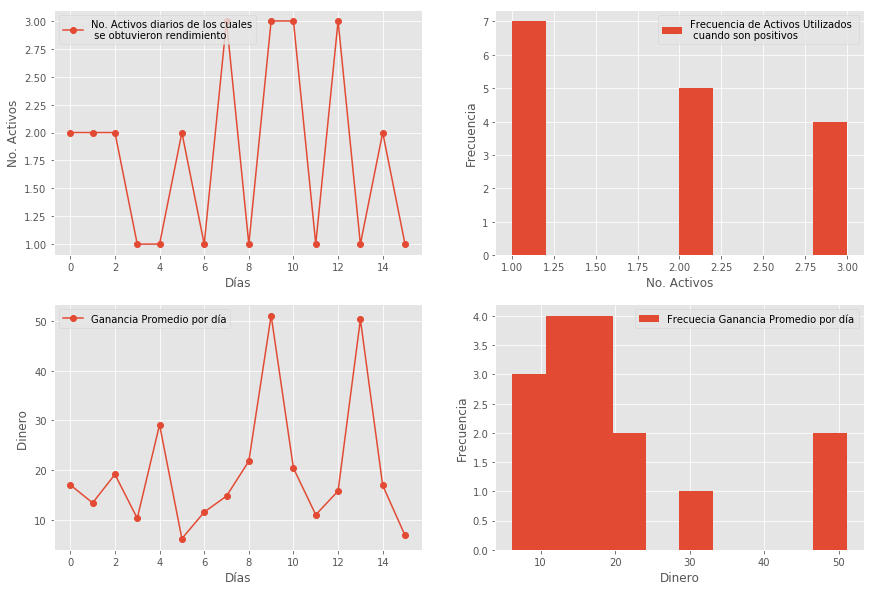

In [140]:
fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
ax.plot([len(l) for l in profits_day],"o-", label="No. Activos diarios de los cuales\n se obtuvieron rendimiento")
ax.legend()
ax.set_xlabel("Días")
ax.set_ylabel("No. Activos")
ax1.hist([len(l) for l in profits_day],stacked=True, label="Frecuencia de Activos Utilizados \n cuando son positivos")
ax1.set_xlabel("No. Activos")
ax1.legend()
ax1.set_ylabel("Frecuencia")
ax2.plot([np.mean([k[1] for k in l]) for l in profits_day ],"o-", label="Ganancia Promedio por día")
ax2.legend()
ax2.set_xlabel("Días")
ax2.set_ylabel("Dinero ")
ax3.hist([np.mean([k[1] for k in l]) for l in profits_day ], label="Frecuecia Ganancia Promedio por día")
ax3.legend()
ax3.set_xlabel("Dinero")
ax3.set_ylabel("Frecuencia")
plt.subplots_adjust(right=2., top=2.)
plt.show()

In [141]:
# Conocer el No. de Activos que tuvieron rendimiento positivo durante el día (Si tuviste más posiciones de pérdia
# que de ganancia sobre un activo no se tomará)
def choose_index(dataframe,l):
    return dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().index.values.tolist()
def choose_values(dataframe,l):
    return  dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().values.tolist()
no_profits_day = [list(zip(*[choose_index(dataframes,l),choose_values(dataframes,l)])) for l in range(len(dataframe))]
no_profits_day = [l for l in no_profits_day if len(l)>=1]
no_profits_day

[[('eurjpy', [-9.16]), ('eurusd', [-4.93])],
 [('eurusd', [-25.37])],
 [('eurusd', [-20.75]), ('xauusd', [-24.8])],
 [('eurusd', [-25.8]),
  ('gbpusd', [-33.64]),
  ('usdcad', [-18.200000000000003])],
 [('gbpjpy', [-14.55]), ('usdjpy', [-21.88]), ('xauusd', [-68.0])],
 [('audusd', [-12.1])],
 [('eurusd', [-4.5])],
 [('usdmxn', [-29.39])],
 [('eurusd', [-24.56])]]

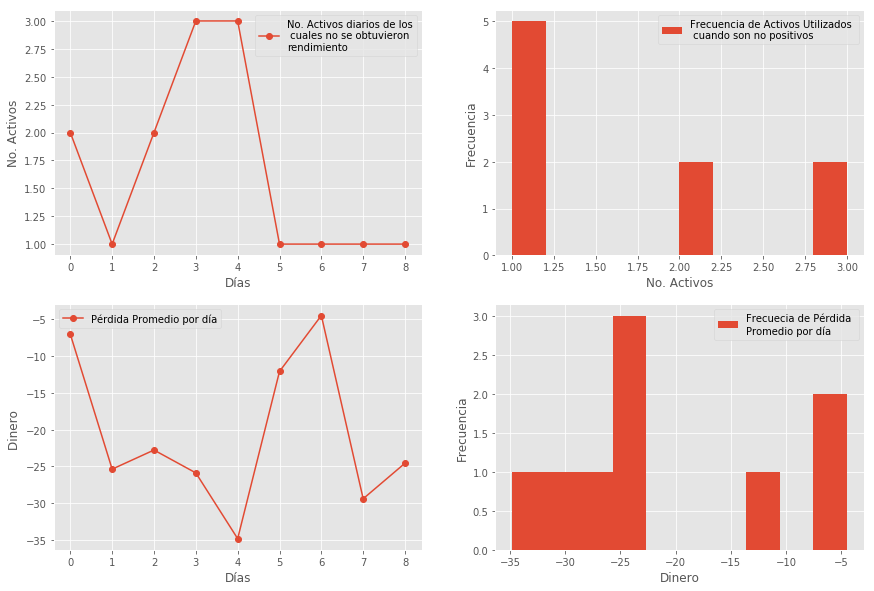

In [144]:
fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
ax.plot([len(l) for l in no_profits_day],"o-", label="No. Activos diarios de los\n cuales no se obtuvieron \nrendimiento")
ax.legend()
ax.set_xlabel("Días")
ax.set_ylabel("No. Activos")
ax1.hist([len(l) for l in no_profits_day],stacked=True, label="Frecuencia de Activos Utilizados \n cuando son no positivos")
ax1.set_xlabel("No. Activos")
ax1.legend()
ax1.set_ylabel("Frecuencia")
ax2.plot([np.mean([k[1] for k in l]) for l in  no_profits_day ],"o-", label="Pérdida Promedio por día")
ax2.legend()
ax2.set_xlabel("Días")
ax2.set_ylabel("Dinero ")
ax3.hist([np.mean([k[1] for k in l]) for l in no_profits_day ], label="Frecuecia de Pérdida \nPromedio por día")
ax3.legend()
ax3.set_xlabel("Dinero")
ax3.set_ylabel("Frecuencia")
plt.subplots_adjust(right=2., top=2.)
plt.show()

In [ ]:
### Semanal

In [11]:
data2= pd.read_excel("archivo_tradeview_2.xlsx").sort_index()
data2["'openTime'"] = [data2['openTime'][k][:10] for k in range(data2.shape[0])]
data2['openTime'] = [datetime.strptime(data2["'openTime'"][k], '%Y.%m.%d') for k in range(data2.shape[0])]

In [12]:
dty=[]
gr = data2.groupby(pd.Grouper(key='openTime',freq='W'))
for name, group in gr:
    if len(group) > 0:        
        dty.append(group)   
dty=[pd.DataFrame(dty[i]).set_index('openTime') for i in range(len(dty))]

In [15]:
def choose_index(dataframe,l):
    return dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().index.values.tolist()
def choose_values(dataframe,l):
    return  dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().values.tolist()
profits_week = [list(zip(*[choose_index(dty,l),choose_values(dty,l)])) for l in range(len(dty))] 
profits_week = [l for l in profits_week if len(l)>=1]
profits_week

[[('eurgbp', [16.07]),
  ('gbpjpy', [21.12]),
  ('gbpusd', [5.62]),
  ('usdjpy', [20.41]),
  ('xauusd', [10.920000000000002])],
 [('usdcad', [22.429999999999993])],
 [('eurusd', [39.46]),
  ('gbpusd', [21.78]),
  ('usdjpy', [2.14]),
  ('usdmxn', [13.61]),
  ('xauusd', [112.92000000000002])],
 [('eurusd', [64.74]),
  ('gbpusd', [35.88]),
  ('usdmxn', [15.33]),
  ('xauusd', [3.42])],
 [('btcusd', [6.84]), ('usdmxn', [7.89]), ('xauusd', [76.17])]]

In [16]:
def choose_index(dataframe,l):
    return dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().index.values.tolist()
def choose_values(dataframe,l):
    return  dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframe[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().values.tolist()
no_profits_week = [list(zip(*[choose_index(dty,l),choose_values(dty,l)])) for l in range(len(dty))]
no_profits_week = [l for l in no_profits_week if len(l)>=1]
no_profits_week

[[('eurjpy', [-9.16]), ('eurusd', [-51.05])],
 [('audusd', [-1.8299999999999983]),
  ('eurusd', [-27.3]),
  ('gbpjpy', [-14.55]),
  ('gbpusd', [-24.29]),
  ('usdjpy', [-21.88]),
  ('xauusd', [-68.0])],
 [('eurusd', [-24.56])]]